### Лабораторная работа №2 (Леденцы)
#### Анализ и кластеризация данных методом k-средних
Подключаем библиотеки

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.style.use('ggplot')

1. Загрузка данных 

In [4]:
df = pd.read_csv('data.dat', sep=';', decimal=',')
print("Первые строки данных:\n", df.head(), "\n")

Первые строки данных:
    V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0   4   5   5   5   3   3   3   3   3    3    3
1   5   4   5   5   3   3   3   3   3    3    3
2   5   5   4   5   3   3   3   3   3    3    3
3   5   4   5   5   3   3   3   3   3    3    3
4   4   5   5   5   3   3   3   3   3    3    3 



2. Нормализация данных

In [5]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Нормализованные данные (первые строки):\n", X_scaled.head(), "\n")

Нормализованные данные (первые строки):
          V1        V2        V3        V4        V5        V6        V7  \
0  0.477424  1.542809  1.499214  1.603442 -0.239138 -0.235068 -0.301875   
1  1.525275  0.495682  1.499214  1.603442 -0.239138 -0.235068 -0.301875   
2  1.525275  1.542809  0.487768  1.603442 -0.239138 -0.235068 -0.301875   
3  1.525275  0.495682  1.499214  1.603442 -0.239138 -0.235068 -0.301875   
4  0.477424  1.542809  1.499214  1.603442 -0.239138 -0.235068 -0.301875   

         V8        V9       V10       V11  
0 -0.353342 -0.623343 -0.594459 -0.600745  
1 -0.353342 -0.623343 -0.594459 -0.600745  
2 -0.353342 -0.623343 -0.594459 -0.600745  
3 -0.353342 -0.623343 -0.594459 -0.600745  
4 -0.353342 -0.623343 -0.594459 -0.600745   



3. Определение оптимального числа кластеров
* Метод "Каменистая осыпь"

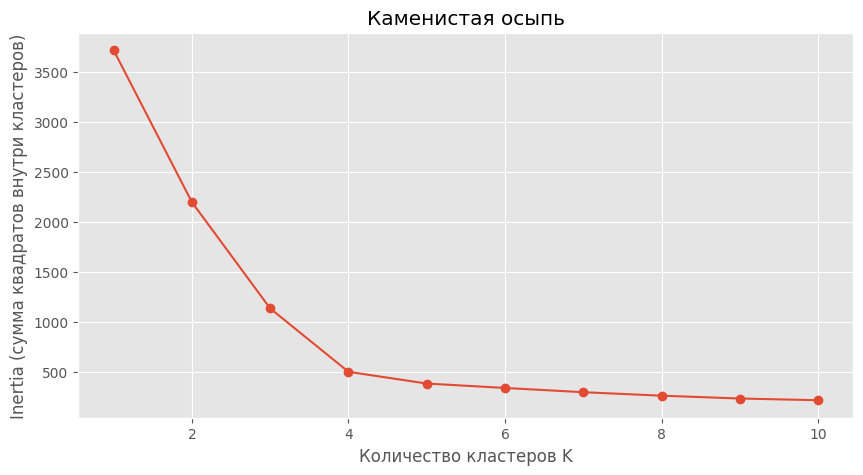

In [6]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.title("Каменистая осыпь")
plt.xlabel("Количество кластеров K")
plt.ylabel("Inertia (сумма квадратов внутри кластеров)")
plt.grid(True)
plt.show()

Исходя из анализа, примерное число кластеров равно 3–4. В качестве оптимального возьмем 4 кластера.

4. Силуэтный коэффициент для оценки качества кластеризации 

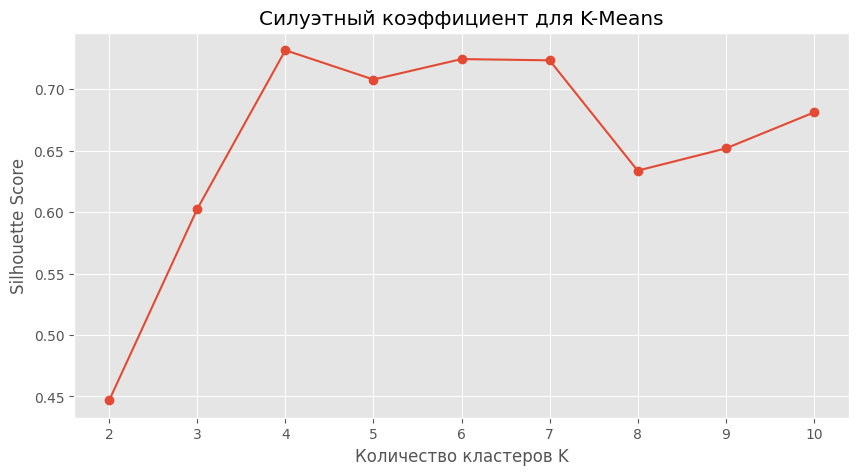

In [7]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(10,5))
plt.plot(range(2,11), sil_scores, marker='o', linestyle='-')
plt.title("Силуэтный коэффициент для K-Means")
plt.xlabel("Количество кластеров K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Убеждаемся с помощью максимального значения силуэтного коэффициента, что оптимальное число кластеров равно 4.

5. Кластеризация K-Means

In [8]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

6. Размеры кластеров

In [12]:
print("Размеры кластеров:\n", df['cluster'].value_counts(), "\n")

Размеры кластеров:
 cluster
2    110
0    108
1     61
3     59
Name: count, dtype: int64 



7. Средние значения признаков в кластерах

In [13]:
cluster_means = df.groupby('cluster').mean()
print("Средние значения признаков по кластерам:\n", cluster_means, "\n")

Средние значения признаков по кластерам:
                V1        V2        V3        V4        V5        V6        V7  \
cluster                                                                         
0        2.824074  2.833333  2.768519  2.620370  2.611111  2.583333  2.750000   
1        3.000000  3.000000  3.000000  3.000000  4.852459  4.852459  3.000000   
2        4.845455  4.800000  4.836364  4.681818  3.036364  3.036364  3.000000   
3        3.000000  2.966102  2.966102  2.915254  2.915254  2.949153  4.915254   

               V8        V9       V10       V11  
cluster                                          
0        2.916667  4.953704  4.814815  4.861111  
1        2.918033  2.754098  2.754098  2.754098  
2        2.990909  3.072727  3.045455  3.045455  
3        4.915254  3.000000  3.000000  3.000000   



8. Интерпретация кластеров

*Кластер 0*: Оздоровительные потребители
- **Характеристика**: Высокие значения V9–V11
- **Основная цель**: Облегчение боли в горле, улучшение самочувствия

*Кластер 1*: Эмоциональные потребители (удовольствие)
- **Характеристика**: Очень высокие значения V5–V6
- **Основная цель**: Получение удовольствия, замена других сладостей

*Кластер 2*: Функциональные потребители
- **Характеристика**: Высокие значения V1–V4
- **Основная цель**: Освежение дыхания, уверенность, гигиена полости рта

*Кластер 3*: Эмоциональные/релаксационные потребители
- **Характеристика**: Очень высокие значения V7–V8
- **Основная цель**: Отвлечение, концентрация, краткий отдых


9. Визуализация кластеров (редуцированные до 2D методом PCA)

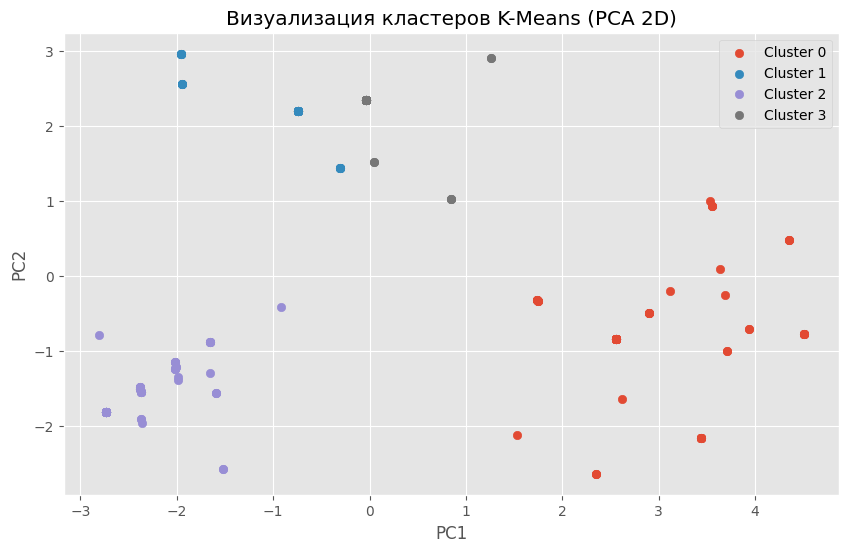

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
for c in range(k_opt):
    plt.scatter(X_pca[df['cluster']==c,0], X_pca[df['cluster']==c,1], label=f'Cluster {c}')
plt.title("Визуализация кластеров K-Means (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Можно заметить, что кластеры 1 и 3 находятся близко друг к другу, и их можно объединить в один.

![Обьединение кластеров](Figure_1.png)

### Вывод

Метод K-Means показал хорошие результаты для сегментации потребителей по целям потребления леденцов. Алгоритм определяет оптимальное число кластеров равным 4, однако, по моему субъективному мнению, более логично рассматривать 3 кластера, объединяя близкие по характеристикам группы.